In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# ЦПТ для различных распределений

## Сгенерируйте примеры из распределения

In [19]:
# Попрбуем получить случайную величину с экспоненциальным рапределением
expon_rv = sts.expon()
sample = expon_rv.rvs(1000)

In [20]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины
real_mean

1.0

In [21]:
real_var = expon_rv.var() # настоящая дисперсия случайной величины
real_var

1.0

## Постройте гистограмму выборки и теоретическую плотность распределения

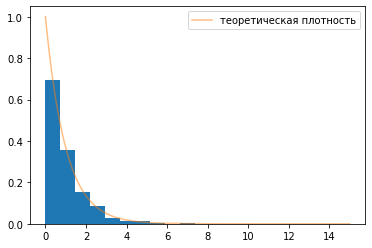

In [22]:
plt.hist(sample, density=True)
x = np.linspace(0,15,1000)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [23]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.0111004109983366
1.067024567679686


## Оценим распределение выборочного среднего для разных объёмов выборок

Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [41]:
# функция для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и оценивает плотности вероятности для распределения выборочных средних

def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = expon_rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности для нормального распределения
    mu = 1 # теоретическое матожидание
    sigma = (1./n) ** 0.5 # теоретическое СКО
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5, alpha=0.5)
    plt.hist(means, density=True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

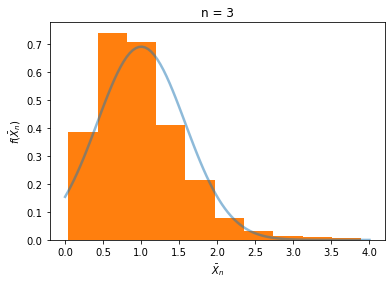

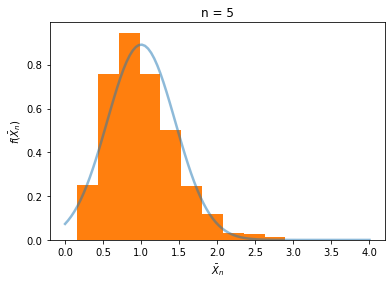

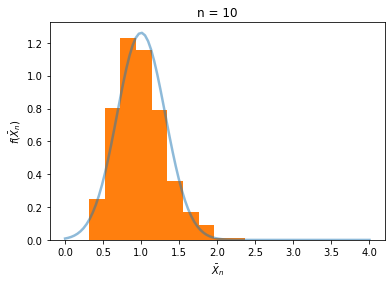

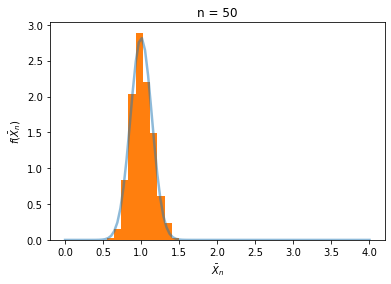

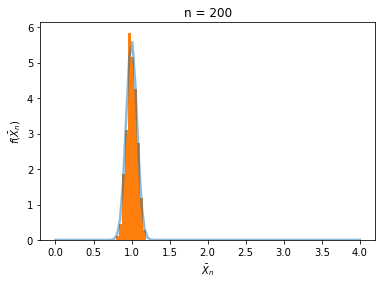

In [43]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [3,5,10,50,200]:
    generate_pdf(n)

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? **Ваш ответ:**

Как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. При n=3 распределение несимметрично и совсем не похоже на нормальное, но уже при n=50 распределение выборочных средних достаточно хорошо соответсвует нормальному. Также стоит отметить, что с ростом n уменьшается дисперсия распределения выборочных средних.

# Доверительный интервал на основе ЦПТ

Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

*Алексей, по прямой ссылке файл скачать не удалось, ошибка: Buffer overflow caught - possible malformed input file
Пришлось скачать файл на диск и открывать с него, если будете проверять у себя - прошу это учесть*

In [3]:
df = pd.read_csv('telecom_churn.csv', error_bad_lines=False)
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Создаем отдельные датафреймы в разрезе оттока клиентов

In [16]:
df_out = df[df["churn"]] # те, кто ушли

In [21]:
df_stay = df[df["churn"] == 0] # те, кто остались

Посчитаем ДИ сначала для клиентов, которые остались

In [83]:
N=df_stay.shape[0]
df_stay["total day calls"].mean()

100.28315789473685

In [84]:
df_stay["total day calls"].std()

19.801156951805503

In [93]:
norm_rv = sts.norm(df_stay["total day calls"].mean(), df_stay["total day calls"].std())

data = norm_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * norm_rv.std() / np.sqrt(N), np.mean(data) + 2 * norm_rv.std() / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.49620867182618, 103.10014402547684] 


И для тех, что ушли

In [86]:
N=df_out.shape[0]
df_out["total day calls"].mean()

101.33540372670808

In [87]:
df_out["total day calls"].std()

21.58230721307551

In [94]:
norm_rv = sts.norm(df_out["total day calls"].mean(), df_out["total day calls"].std())

data = norm_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * norm_rv.std() / np.sqrt(N), np.mean(data) + 2 * norm_rv.std() / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [98.61146357073385, 102.5395794968823] 


А теперь посчитаем при помощи _zconfint_generic

In [50]:
from statsmodels.stats.weightstats import _zconfint_generic

In [60]:
def confidence_interval(frame):
    std = frame.std(ddof=1)
    mean = frame.mean()
    count = frame.shape[0]
    return _zconfint_generic(mean, std/np.sqrt(count), 0.05, "two-sided")

In [65]:
trust_interval_stay = confidence_interval(df_stay["total day calls"])
print ("total day calls, доверительный интервал: ", np.round(trust_interval_stay, 4))
print ("total day calls, среднее", np.round(df_stay["total day calls"].mean(), 4))

total day calls, доверительный интервал:  [ 99.5562 101.0101]
total day calls, среднее 100.2832


In [92]:
trust_interval_out = confidence_interval(df_out["total day calls"])
print ("total day calls, доверительный инетервал: ", np.round(trust_interval_out, 4))
print ("total day calls, среднее", np.round(df_out["total day calls"].mean(), 4))

total day calls, доверительный инетервал:  [ 99.4107 103.2601]
total day calls, среднее 101.3354


Сложно оценить, какой метод предпочтительней, результаты обоих способов оценки очень близки